In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pcr_df= pd.read_excel("MLE 2/TrainDataset2024.xls")

In [3]:
pcr_df.head()

,ID,pCR,RelapseFreeSurvival,Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,TRG002174,1,144.0,41.0,0,0,0,1,3,3,...,0.517172,0.375126,3.325332,0.002314,3880771.500,473.464852,0.000768,0.182615,0.030508,0.000758
1,TRG002178,0,142.0,39.0,1,1,0,0,3,3,...,0.444391,0.444391,3.032144,0.005612,2372009.744,59.459710,0.004383,0.032012,0.001006,0.003685
2,TRG002204,1,135.0,31.0,0,0,0,1,2,1,...,0.534549,0.534549,2.485848,0.006752,1540027.421,33.935384,0.007584,0.024062,0.000529,0.006447
3,TRG002206,0,12.0,35.0,0,0,0,1,3,3,...,0.506185,0.506185,2.606255,0.003755,6936740.794,46.859265,0.005424,0.013707,0.000178,0.004543
4,TRG002210,0,109.0,61.0,1,0,0,0,2,1,...,0.462282,0.462282,2.809279,0.006521,1265399.054,39.621023,0.006585,0.034148,0.001083,0.005626


In [4]:
pcr_df.shape

(400, 121)

In [5]:
pcr_df.replace(999, np.nan, inplace = True)

In [6]:
pcr_df.isnull().sum()

ID                           0
pCR                          5
RelapseFreeSurvival          0
Age                          0
ER                           0
                            ..
original_ngtdm_Busyness      0
original_ngtdm_Coarseness    0
original_ngtdm_Complexity    0
original_ngtdm_Contrast      0
original_ngtdm_Strength      0
Length: 121, dtype: int64

In [13]:
total_missing = pcr_df.isnull().sum().sum()
print(f"Total missing values: {total_missing}")

total_cells = pcr_df.size
percentage_missing = (total_missing / total_cells) * 100
print(f"Percentage of missing values: {percentage_missing:.2f}%")


Total missing values: 105
Percentage of missing values: 0.22%


In [15]:
pcr_dropped = pcr_df[['ID', 'RelapseFreeSurvival']]
print(pcr_dropped)

            ID  RelapseFreeSurvival
0    TRG002174           144.000000
1    TRG002178           142.000000
2    TRG002204           135.000000
3    TRG002206            12.000000
4    TRG002210           109.000000
..         ...                  ...
395  TRG002948            54.500000
396  TRG002954            49.250000
397  TRG002958            48.500000
398  TRG002961            47.500000
399  TRG002962            46.916667

[400 rows x 2 columns]


In [17]:
pcr_df = pcr_df.drop(columns=['ID', 'RelapseFreeSurvival'], axis=1)
pcr_df.head()

,pCR,Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,1.0,41.0,0,0.0,0.0,1.0,3.0,3.0,1.0,1.0,...,0.517172,0.375126,3.325332,0.002314,3880771.500,473.464852,0.000768,0.182615,0.030508,0.000758
1,0.0,39.0,1,1.0,0.0,0.0,3.0,3.0,1.0,1.0,...,0.444391,0.444391,3.032144,0.005612,2372009.744,59.459710,0.004383,0.032012,0.001006,0.003685
2,1.0,31.0,0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,...,0.534549,0.534549,2.485848,0.006752,1540027.421,33.935384,0.007584,0.024062,0.000529,0.006447
3,0.0,35.0,0,0.0,0.0,1.0,3.0,3.0,1.0,1.0,...,0.506185,0.506185,2.606255,0.003755,6936740.794,46.859265,0.005424,0.013707,0.000178,0.004543
4,0.0,61.0,1,0.0,0.0,0.0,2.0,1.0,1.0,0.0,...,0.462282,0.462282,2.809279,0.006521,1265399.054,39.621023,0.006585,0.034148,0.001083,0.005626


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

scaler = StandardScaler()
numeric_columns = pcr_df.select_dtypes(include=['float64', 'int64']).columns
pcr_df[numeric_columns] = scaler.fit_transform(pcr_df[numeric_columns])
print("Standardized Data:")
pcr_df.head()


Standardized Data:


,pCR,Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,1.924157,-0.988097,-1.099975,-0.826767,-0.655826,1.414214,1.198570,1.860978,-0.417799,0.934473,...,0.729513,-0.098979,0.789528,-0.427579,-0.075005,0.282675,-0.183281,2.667250,2.932838,-0.246730
1,-0.519708,-1.170999,0.909112,1.209530,-0.655826,-0.707107,1.198570,1.860978,-0.417799,0.934473,...,0.292187,0.330194,0.405739,0.937740,-0.077144,-0.113827,-0.183281,-0.528922,-0.592650,-0.221445
2,1.924157,-1.902606,-1.099975,-0.826767,-0.655826,1.414214,-0.800726,-0.751612,-0.417799,-1.070122,...,0.833929,0.888831,-0.309375,1.409308,-0.078323,-0.138272,-0.183281,-0.697655,-0.649565,-0.197586
3,-0.519708,-1.536803,-1.099975,-0.826767,-0.655826,1.414214,1.198570,1.860978,-0.417799,0.934473,...,0.663496,0.713083,-0.151761,0.168875,-0.070674,-0.125894,-0.183281,-0.917409,-0.691620,-0.214034
4,-0.519708,0.840921,0.909112,-0.826767,-0.655826,-0.707107,-0.800726,-0.751612,-0.417799,-1.070122,...,0.399691,0.441051,0.114003,1.313876,-0.078713,-0.132826,-0.183281,-0.483605,-0.583366,-0.204678


In [20]:
imputer = KNNImputer(n_neighbors=3)
pcr_df[:] = imputer.fit_transform(pcr_df)

print("Data After KNN Imputation:")
print(pcr_df.head())


Data After KNN Imputation:
        pCR       Age        ER       PgR      HER2  TrippleNegative  \
0  1.924157 -0.988097 -1.099975 -0.826767 -0.655826         1.414214   
1 -0.519708 -1.170999  0.909112  1.209530 -0.655826        -0.707107   
2  1.924157 -1.902606 -1.099975 -0.826767 -0.655826         1.414214   
3 -0.519708 -1.536803 -1.099975 -0.826767 -0.655826         1.414214   
4 -0.519708  0.840921  0.909112 -0.826767 -0.655826        -0.707107   

   ChemoGrade  Proliferation  HistologyType  LNStatus  ...  \
0    1.198570       1.860978      -0.417799  0.934473  ...   
1    1.198570       1.860978      -0.417799  0.934473  ...   
2   -0.800726      -0.751612      -0.417799 -1.070122  ...   
3    1.198570       1.860978      -0.417799  0.934473  ...   
4   -0.800726      -0.751612      -0.417799 -1.070122  ...   

   original_glszm_SmallAreaHighGrayLevelEmphasis  \
0                                       0.729513   
1                                       0.292187   
2          

In [23]:
pcr_df[numeric_columns] = scaler.inverse_transform(pcr_df[numeric_columns])

print("Data Reverted to Original Scale:")
print(pcr_df.head())

Data Reverted to Original Scale:
   pCR   Age   ER  PgR  HER2  TrippleNegative  ChemoGrade  Proliferation  \
0  1.0  41.0  0.0  0.0   0.0              1.0         3.0            3.0   
1  0.0  39.0  1.0  1.0   0.0              0.0         3.0            3.0   
2  1.0  31.0  0.0  0.0   0.0              1.0         2.0            1.0   
3  0.0  35.0  0.0  0.0   0.0              1.0         3.0            3.0   
4  0.0  61.0  1.0  0.0   0.0              0.0         2.0            1.0   

   HistologyType  LNStatus  ...  \
0            1.0       1.0  ...   
1            1.0       1.0  ...   
2            1.0       0.0  ...   
3            1.0       1.0  ...   
4            1.0       0.0  ...   

   original_glszm_SmallAreaHighGrayLevelEmphasis  \
0                                       0.517172   
1                                       0.444391   
2                                       0.534549   
3                                       0.506185   
4                                      

In [25]:
class_counts = pcr_df["pCR"].value_counts()
print("Class distribution:\n", class_counts)

class_percentages = pcr_df["pCR"].value_counts(normalize=True) * 100
print("\nClass distribution percentages:\n", class_percentages)

Class distribution:
 pCR
0.000000    314
1.000000     84
0.666667      1
0.666667      1
Name: count, dtype: int64

Class distribution percentages:
 pCR
0.000000    78.50
1.000000    21.00
0.666667     0.25
0.666667     0.25
Name: proportion, dtype: float64


In [27]:
print(pcr_df['pCR'].unique())

[1.         0.         0.66666667 0.66666667]


In [29]:
pcr_df['pCR'] = pcr_df['pCR'].round()
print(pcr_df['pCR'].value_counts())


pCR
0.0    314
1.0     86
Name: count, dtype: int64


Normality Tests for group 0:
Shapiro-Wilk Test p-value: 1.0938048030882306e-25
D'Agostino's K^2 Test p-value: 3.790285725208807e-15


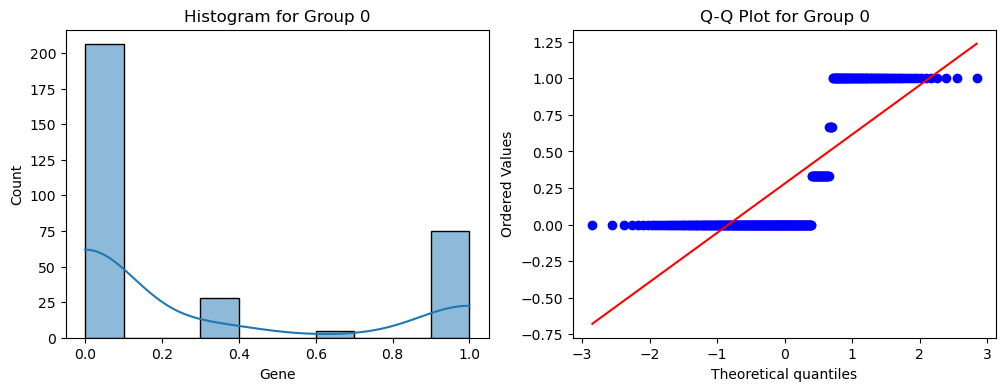

Normality Tests for group 1:
Shapiro-Wilk Test p-value: 1.3088968515725528e-11
D'Agostino's K^2 Test p-value: 5.479671999209233e-05


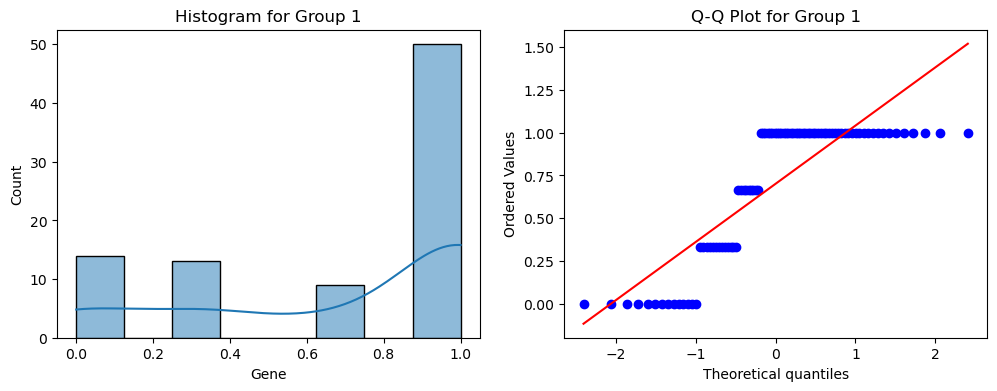

In [31]:
from scipy.stats import shapiro, normaltest, levene, probplot
import matplotlib.pyplot as plt
import seaborn as sns

# Separate the two groups
group_0 = pcr_df[pcr_df['pCR'] == 0]
group_1 = pcr_df[pcr_df['pCR'] == 1]

def test_normality(data, group_name):
    # Shapiro-Wilk Test
    shapiro_pval = shapiro(data.dropna())[1]
    
    # D'Agostino's K^2 Test
    dagostino_pval = normaltest(data.dropna())[1]
    
    print(f"Normality Tests for group {group_name}:")
    print(f"Shapiro-Wilk Test p-value: {shapiro_pval}")
    print(f"D'Agostino's K^2 Test p-value: {dagostino_pval}")

    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data.dropna(), kde=True)
    plt.title(f'Histogram for Group {group_name}')
    

    plt.subplot(1, 2, 2)
    probplot(data.dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for Group {group_name}')
    
    plt.show()
    
    return shapiro_pval, dagostino_pval

shapiro_0_pval, dagostino_0_pval = test_normality(group_0['Gene'].dropna(), "0")
shapiro_1_pval, dagostino_1_pval = test_normality(group_1['Gene'].dropna(), "1")

In [32]:
#Levene's Test for Equal Variance
def test_variance():
    # Levene's Test
    stat, p_value = levene(group_0['Gene'].dropna(), group_1['Gene'].dropna())
    
    print("\nLevene's Test Results:")
    print(f"Test Statistic: {stat}")
    print(f"P-Value: {p_value}")
    
    if p_value < 0.05:
        print("The variances are unequal.")
    else:
        print("The variances are equal.")

test_variance()



Levene's Test Results:
Test Statistic: 0.14444754644046015
P-Value: 0.7041017145253519
The variances are equal.


In [35]:
from sklearn.feature_selection import mutual_info_classif

X = pcr_df.drop(columns=["pCR"])  
y = pcr_df["pCR"]

mi_scores = mutual_info_classif(X, y, random_state=32)

mi_df = pd.DataFrame({
    'Feature': X.columns,
    'MI_Score': mi_scores
})

mi_df = mi_df.sort_values(by='MI_Score', ascending=False)
print("Top 20 features by mutual information score:")
print(mi_df.head(20))

important_features = ['ER', 'HER2', 'Gene']
top_features = mi_df['Feature'].head(16).tolist() 

final_features = list(set(important_features + top_features))
print(f"Final selected features for modeling: {final_features}")


Top 20 features by mutual information score:
                                             Feature  MI_Score
10                                              Gene  0.098391
2                                                PgR  0.047066
40                   original_firstorder_TotalEnergy  0.042584
27                        original_firstorder_Energy  0.042584
16               original_shape_Maximum2DDiameterRow  0.040923
0                                                Age  0.035155
107                 original_glszm_SmallAreaEmphasis  0.029741
90             original_glrlm_RunLengthNonUniformity  0.028870
117                          original_ngtdm_Strength  0.028231
68             original_gldm_DependenceNonUniformity  0.028058
108    original_glszm_SmallAreaHighGrayLevelEmphasis  0.027733
111                    original_glszm_ZonePercentage  0.027196
109     original_glszm_SmallAreaLowGrayLevelEmphasis  0.026239
97             original_glszm_GrayLevelNonUniformity  0.025195
91   origi

In [37]:
pcr_df0 = X[final_features]
pcr_df0.head()

,original_shape_Maximum2DDiameterRow,original_glrlm_RunLengthNonUniformityNormalized,original_firstorder_Energy,original_firstorder_TotalEnergy,Gene,original_glszm_ZonePercentage,original_firstorder_Range,original_glszm_GrayLevelNonUniformity,HER2,Age,PgR,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_ngtdm_Strength,original_gldm_DependenceNonUniformity,original_glrlm_RunLengthNonUniformity,original_glszm_SmallAreaLowGrayLevelEmphasis,ER
0,38.626416,0.184874,2897.68930,2897.68930,1.0,0.002314,3.366632,27.545455,0.0,41.0,0.0,0.403535,0.517172,0.000758,1164.363949,677.118614,0.375126,0.0
1,41.761226,0.084497,41105.32510,41105.32510,0.0,0.005612,4.964442,78.025000,0.0,39.0,1.0,0.444391,0.444391,0.003685,4650.251438,159.837285,0.444391,1.0
2,40.447497,0.079355,19774.94893,19774.94893,1.0,0.006752,4.867321,72.027027,0.0,31.0,0.0,0.534549,0.534549,0.006447,3374.309307,114.255050,0.534549,0.0
3,44.944410,0.065202,72854.17151,72854.17151,1.0,0.003755,3.881506,99.019802,0.0,35.0,0.0,0.506185,0.506185,0.004543,8662.085096,212.625994,0.506185,0.0
4,30.594117,0.091210,15697.30914,15697.30914,1.0,0.006521,3.181566,56.034483,0.0,61.0,0.0,0.462282,0.462282,0.005626,3195.159883,101.119011,0.462282,1.0


In [39]:
pcr_df0.shape

(400, 18)

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
selected_features= [
    'original_firstorder_Energy', 
    'original_shape_Maximum2DDiameterRow',
    'original_ngtdm_Strength',
    'original_glszm_ZonePercentage',
    'Age',
    'original_glszm_SmallAreaLowGrayLevelEmphasis',
    'original_glszm_GrayLevelNonUniformity',
    'original_glrlm_RunLengthNonUniformityNormalized',
    'HER2',
    'original_firstorder_TotalEnergy',
    'original_glrlm_RunLengthNonUniformity',
    'original_firstorder_Range',
    'original_glszm_SmallAreaHighGrayLevelEmphasis',
    'original_glszm_SmallAreaEmphasis',
    'original_gldm_DependenceNonUniformity',
    'PgR',
    'Gene',
    'ER'
]
'''
plt.figure(figsize=(15, 12))
for i, feature in enumerate(selected_features):
    plt.subplot(6, 3, i + 1)  # Create a 6x3 grid for visualization
    sns.scatterplot(x=selected_df[feature], y=selected_df['pCR'], alpha=0.6)
    plt.xlabel(feature)
    plt.ylabel('pCR')
    plt.title(f'{feature} vs pCR')
    
plt.tight_layout()
plt.show()'''

"\nplt.figure(figsize=(15, 12))\nfor i, feature in enumerate(selected_features):\n    plt.subplot(6, 3, i + 1)  # Create a 6x3 grid for visualization\n    sns.scatterplot(x=selected_df[feature], y=selected_df['pCR'], alpha=0.6)\n    plt.xlabel(feature)\n    plt.ylabel('pCR')\n    plt.title(f'{feature} vs pCR')\n    \nplt.tight_layout()\nplt.show()"

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
 
X = pcr_df[final_features] 
y = pcr_df["pCR"] 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [123]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, balanced_accuracy_score

svm_model = SVC(probability=True)
param_dist = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1e-3, 1e-2, 0.1, 1, 10],
    'kernel': ['poly'],  
    'class_weight': ['balanced']
}

random_search = RandomizedSearchCV(
    estimator=svm_model,
    param_distributions=param_dist,
    n_iter=25,  
    scoring='f1',  
    cv=8,  
    verbose=2,
    random_state=42,
    n_jobs=-1
)


random_search.fit(X_train_scaled, y_train)
best_model = random_search.best_estimator_
print("Best hyperparameters found:", random_search.best_params_)
y_pred = best_model.predict(X_test_scaled)
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1] 

print("\nClassification Report for svm:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("\nROC-AUC Score:", roc_auc)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("\nBalanced Accuracy Score:", balanced_acc)


Fitting 8 folds for each of 25 candidates, totalling 200 fits
Best hyperparameters found: {'kernel': 'poly', 'gamma': 0.1, 'class_weight': 'balanced', 'C': 1}

Classification Report for svm:
               precision    recall  f1-score   support

         0.0       0.92      0.90      0.91        63
         1.0       0.67      0.71      0.69        17

    accuracy                           0.86        80
   macro avg       0.79      0.81      0.80        80
weighted avg       0.87      0.86      0.86        80


Confusion Matrix:
 [[57  6]
 [ 5 12]]

ROC-AUC Score: 0.8674136321195145

Balanced Accuracy Score: 0.8053221288515406


In [46]:
pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.


In [47]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [48]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, classification_report, confusion_matrix
from skopt import BayesSearchCV
from skopt.space import Integer, Real, Categorical

In [49]:
# Objective function for Bayesian optimization
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 5, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced']),
    }
    
    model = RandomForestClassifier(**params, random_state=32, n_jobs=-1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = balanced_accuracy_score(y_test, y_pred)
    
    return score

#the Bayesian optimization study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)
print("Best hyperparameters found:")
print(study.best_params)


[I 2024-12-08 07:43:33,653] A new study created in memory with name: no-name-36efd870-35be-4196-992b-cab8e051d7f3
[I 2024-12-08 07:43:35,143] Trial 0 finished with value: 0.5802987861811391 and parameters: {'n_estimators': 464, 'max_depth': 12, 'min_samples_split': 8, 'min_samples_leaf': 2, 'class_weight': None}. Best is trial 0 with value: 0.5802987861811391.
[I 2024-12-08 07:43:36,083] Trial 1 finished with value: 0.7306255835667601 and parameters: {'n_estimators': 310, 'max_depth': 7, 'min_samples_split': 19, 'min_samples_leaf': 8, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.7306255835667601.
[I 2024-12-08 07:43:37,124] Trial 2 finished with value: 0.5294117647058824 and parameters: {'n_estimators': 351, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 7, 'class_weight': None}. Best is trial 1 with value: 0.7306255835667601.
[I 2024-12-08 07:43:37,689] Trial 3 finished with value: 0.6876750700280112 and parameters: {'n_estimators': 161, 'max_depth': 13, 'mi

Best hyperparameters found:
{'n_estimators': 187, 'max_depth': 15, 'min_samples_split': 11, 'min_samples_leaf': 10, 'class_weight': 'balanced'}


In [115]:
best_model = RandomForestClassifier(**study.best_params, random_state=32, n_jobs=-1)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc}")

print("\nClassification Report for random forest:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
print(f"\nROC-AUC Score: {roc_auc}")


Balanced Accuracy: 0.7973856209150327

Classification Report for random forest:
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.90        63
         1.0       0.63      0.71      0.67        17

    accuracy                           0.85        80
   macro avg       0.77      0.80      0.78        80
weighted avg       0.86      0.85      0.85        80


Confusion Matrix:
[[56  7]
 [ 5 12]]

ROC-AUC Score: 0.8935574229691876


In [121]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix, roc_auc_score

adaboost_model = AdaBoostClassifier(random_state=42)
param_dist = {
    'n_estimators': [50, 100, 150, 200, 250],  
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],  
    'algorithm': ['SAMME', 'SAMME.R']  
}

random_search = RandomizedSearchCV(
    estimator=adaboost_model,
    param_distributions=param_dist,
    n_iter=23,  
    scoring='balanced_accuracy',
    cv=11, 
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_scaled, y_train)

best_adaboost_model = random_search.best_estimator_
print("Best hyperparameters found:", random_search.best_params_)

y_pred = best_adaboost_model.predict(X_test_scaled)

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("\nBalanced Accuracy Scorefor ada :", balanced_acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, best_adaboost_model.predict_proba(X_test_scaled)[:, 1]))


Fitting 11 folds for each of 23 candidates, totalling 253 fits
Best hyperparameters found: {'n_estimators': 250, 'learning_rate': 1.0, 'algorithm': 'SAMME'}

Balanced Accuracy Scorefor ada : 0.6741363211951448

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.94      0.89        63
         1.0       0.64      0.41      0.50        17

    accuracy                           0.82        80
   macro avg       0.75      0.67      0.70        80
weighted avg       0.81      0.82      0.81        80


Confusion Matrix:
 [[59  4]
 [10  7]]

ROC-AUC Score: 0.8440709617180205


In [79]:
pip install --upgrade scikit-learn



   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 5.6 MB/s eta 0:00:02
   ---- ----------------------------------- 1.3/11.0 MB 5.2 MB/s eta 0:00:02
   ------- -------------------------------- 2.1/11.0 MB 3.8 MB/s eta 0:00:03
   -------- ------------------------------- 2.4/11.0 MB 3.4 MB/s eta 0:00:03
   ---------- ----------------------------- 2.9/11.0 MB 3.1 MB/s eta 0:00:03
   ------------ --------------------------- 3.4/11.0 MB 2.9 MB/s eta 0:00:03
   -------------- ------------------------- 3.9/11.0 MB 2.9 MB/s eta 0:00:03
   --------------- ------------------------ 4.2/11.0 MB 2.9 MB/s eta 0:00:03
   ------------------ --------------------- 5.0/11.0 MB 2.7 MB/s eta 0:00:03
   ------------------- -------------------- 5.2/11.0 MB 2.6 MB/s eta 0:00:03
   --------------------- ------------------ 6.0/11.0 MB 2.6 MB/s eta 0:00:02
   ----------------------- ---------------- 6.6/11.0 MB 2.7 MB/s eta 0:00:02
   --

In [125]:
from sklearn.tree import DecisionTreeClassifier
from skopt import BayesSearchCV
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, classification_report, confusion_matrix

dt_model = DecisionTreeClassifier(random_state=42)
param_space = {
    'max_depth': (1, 20), 
    'min_samples_split': (2, 20),  
    'min_samples_leaf': (1, 20), 
    'criterion': ['gini', 'entropy'] 
}

bayes_search = BayesSearchCV(
    estimator=dt_model,
    search_spaces=param_space,
    n_iter=25, 
    cv=8, 
    scoring='balanced_accuracy',
    random_state=42,
    n_jobs=-1 
)
bayes_search.fit(X_train_scaled, y_train)
print("Best hyperparameters:", bayes_search.best_params_)
best_dt_model = bayes_search.best_estimator_
y_pred = best_dt_model.predict(X_test_scaled)
y_pred_proba = best_dt_model.predict_proba(X_test_scaled)[:, 1]

balanced_acc = balanced_accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("\nDecision Tree - Balanced Accuracy Score:", balanced_acc)
print("\nDecision Tree - ROC-AUC Score:", roc_auc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Best hyperparameters: OrderedDict([('criterion', 'entropy'), ('max_depth', 17), ('min_samples_leaf', 17), ('min_samples_split', 3)])

Decision Tree - Balanced Accuracy Score: 0.8323996265172735

Decision Tree - ROC-AUC Score: 0.8935574229691877

Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.84      0.89        63
         1.0       0.58      0.82      0.68        17

    accuracy                           0.84        80
   macro avg       0.76      0.83      0.79        80
weighted avg       0.87      0.84      0.85        80


Confusion Matrix:
 [[53 10]
 [ 3 14]]


In [177]:
import joblib
joblib.dump(best_dt_model, 'decision_tree_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [179]:
loaded_dt_model = joblib.load('decision_tree_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')

In [181]:
test_df = pd.read_excel('MLE 2/TestDatasetExample.xls')
test_features = test_df[final_features]

In [183]:
test_features_scaled = loaded_scaler.transform(test_features)

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(pcr_df0, y)  
joblib.dump(dt_model, 'decision_tree_model.pkl')

In [185]:
test_predictions = loaded_dt_model.predict(test_features_scaled)
test_df['predictions'] = test_predictions
test_df.to_csv('predictions_output.csv', index=False)

print("Predictions saved successfully to 'predictions_output.csv'")

Predictions saved successfully to 'predictions_output.csv'


In [187]:
print(test_df['predictions'])

0    0.0
1    1.0
2    1.0
Name: predictions, dtype: float64
